<a href="https://colab.research.google.com/github/brenosyperrek/ufsc_dc_exercicios/blob/main/Data_Split_and_Evaluation_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

Federal University of Santa Catarina (UFSC)

Computer Science Graduate Program (PPGCC)


# INE410416 - Applied Machine Learning
## Lecture 9a - Data Split and Evaluation Metrics
#### Prof. Dr. Jônata Tyska Carvalho
#### Prof. Dr. Mateus Grellert da Silva

<font size="10"> The General Framework for Supervised Learning </font>

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/general_classification_framework.png" width="40%" />

Tan, P. N., Steinbach, M., & Kumar, V. (2016). Introduction to data mining. Pearson Education India. 


<font size="10"> Outline </font>

<font size="5">
    
- Why data split?
- Basic concepts and methods  
    - Holdout
    - Cross-validation
- Evaluation metrics for Classification
    - Confusion Matrix
    - Accuracy, precision, recall and F1-Score
    - ROC/AUC and PR Curve
- Evaluation metrics for Regression
       
</font>


<font size="10"> Why data split? </font>

As we know, the main **Predictive modelling goal** is building a model capable of predicting the outcome variable based on input features of new/unseen data.

- **Training error**: commited on the training set;
- **Test error**: commited on the test set;
- **Generalization error**: expected error in production (real data);

Remeber that the training error is not a good estimate of the model's performance, i. e. its generalization capacity.

<font size="10"> Example Data Set</font>

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/example_dataset.png" width="70%" />

Tan, P. N., Steinbach, M., & Kumar, V. (2016). Introduction to data mining. Pearson Education India.

<font size="10"> Decision tree # of nodes X training error</font>

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/example_dataset2.png" width="60%" />

Tan, P. N., Steinbach, M., & Kumar, V. (2016). Introduction to data mining. Pearson Education India.

<font size="10"> A tree with four nodes</font>

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/example_dataset3.png" width="60%" />

Tan, P. N., Steinbach, M., & Kumar, V. (2016). Introduction to data mining. Pearson Education India.

<font size="10"> A tree with fifty nodes</font>

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/example_dataset4.png" width="60%" />

Tan, P. N., Steinbach, M., & Kumar, V. (2016). Introduction to data mining. Pearson Education India.

<font size="10"> Which is better? </font>

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/example_dataset5.png" width="60%" />

Tan, P. N., Steinbach, M., & Kumar, V. (2016). Introduction to data mining. Pearson Education India.

<font size="10"> Test error increases and training error decreases </font>

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/example_dataset6.png" width="80%" />

**Underfitting:** when model is too simple, both errors are large

**Overfitting:** model is too complex, training error small but test error is large

Tan, P. N., Steinbach, M., & Kumar, V. (2016). Introduction to data mining. Pearson Education India.

<font size="10"> Training on more data can reduce overfitting </font>

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/example_dataset7.png" width="80%" />



Tan, P. N., Steinbach, M., & Kumar, V. (2016). Introduction to data mining. Pearson Education India.

<font size="10"> Reasons for model overfitting </font>

- **Limited Training Size:** patterns learned do not fully represent the real data
- **High Model Complexity:** overly complex model has a tendency to learn specific patterns in the training set

So splitting the dataset is a way to estimate performance of a model on previously unseen data (**test set**). Hyper-parameter tuning is done on the **validation set** (or using cross validation).

<font size="10"> Data split - holdout </font>

<img src="https://www.upgrad.com/blog/wp-content/uploads/2020/01/data-preprocessing-machine-learning-5.png" width="70%">

image source: https://www.upgrad.com/blog/data-preprocessing-in-machine-learning/

<font size="10"> Data split - holdout </font>

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.bualabs.com%2Fwp-content%2Fuploads%2F2019%2F07%2Ftrain-validation-test-split-data-1.jpg&f=1&nofb=1" width="70%">

image source: https://www.bualabs.com/archives/532/what-is-training-set-why-train-test-split-training-set-validation-set-test-set/

<font size="10"> Holdout </font>

- Reserve k% for training and (100-k)% for testing
- for hyper-parameter tuning either divide the training again (a new holdout) or use cross-validation
- What proportion to use? Historically 2/3 for training and 1/3 for testing, however it is not a hard rule

   --> for very small datasets it may not be feasible to *lose* data for building the model, it might lead to overfitting
   
   --> for huge datasets, 1/3 may be too much data for testing
   
   --> too small test sets can lead to a not reliable generalization performance estimate, different partitioning will lead to rather different results

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = FEATURE_NAMES)
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100,stratify=y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train)

accuracy_train = sum(model.predict(X_train)==y_train)/len(y_train)
accuracy_test = sum(model.predict(X_test)==y_test)/len(y_test)
print(f"Training accuracy = {accuracy_train*100}% - Test accuracy = {accuracy_test*100}%")

Training accuracy = 100.0% - Test accuracy = 92.0%


<font size="10"> Repeated Holdout </font>

- also called random subsubsampling
- Repeat holdout several times
    - instances can appear more than once on training/test sets on different repetitions
    - main difference from k-fold cross validation
- Indicated when different partitioning lead to high variance on the generalization estimate


<font size="10"> k-fold cross-validation </font>

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="50%">

image source: https://scikit-learn.org/stable/modules/cross_validation.html


<font size="10"> k-fold cross-validation </font>

- partition data into k disjoint subset
- k-fold: train on k-1 partitions, test on the remaining one
- the smaller the k, the smaller the training set: usually a larger generalization error
- the larger the k, the larger the training set: reduced bias in the generalization error
- extreme case: leave-one-out - k=data set size (N)


In [ ]:
from sklearn import preprocessing

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

X = dataset.iloc[:, :-1].values
y = pd.DataFrame(dataset.iloc[:, 4].values,columns=['Class'])

#label encoder - categorical to numeric - the sklearn libreary internally converts to one hot encoding
le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99,stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(2,2),max_iter=3000,random_state=171)
mlp.fit(X_train, y_train.values.ravel())
accuracy = sum(mlp.predict(X_test)==y_test.values.ravel())/len(y_test.values.ravel())
print(f"Accuracy {accuracy*100}%")

Accuracy 32.0%


In [ ]:
#example of hyper-params optimization using k-fold cross-validation
from sklearn.model_selection import cross_val_score

test_arch = [(1,3),(1,5,2),(3,3),(5,1),(1,5)]

for arch in test_arch:
    print(f"Testing architecture {arch}")
    model = MLPClassifier(hidden_layer_sizes=arch, random_state=1, max_iter=2000)
    accuracy = cross_val_score(model, X_train, y_train.values.ravel(), cv = 10)
    print(accuracy)
    print("Average accuracy: ",accuracy.mean())

Testing architecture (1, 3)
[0.7 0.7 0.7 0.6 0.6 0.6 0.7 0.7 0.7 0.7]
Average accuracy:  0.6699999999999999
Testing architecture (1, 5, 2)
[0.6 0.6 0.6 0.6 0.6 0.6 0.7 0.7 0.7 0.8]
Average accuracy:  0.65
Testing architecture (3, 3)
[1.  0.9 0.9 1.  0.8 1.  0.9 1.  1.  1. ]
Average accuracy:  0.95
Testing architecture (5, 1)
[0.3 0.3 0.3 0.3 0.3 0.3 0.4 0.4 0.4 0.4]
Average accuracy:  0.33999999999999997
Testing architecture (1, 5)
[0.6 0.6 0.6 0.7 0.7 0.8 0.7 0.7 0.7 0.8]
Average accuracy:  0.6900000000000001


<font size="10"> cross-validation variations</font>

- repeated cross-validation: perform CV a number of times
    - gives an estimate of the variance of the generalization error
- stratified cross-validation (see <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html"> StratifiedKFold</a>)
   - guaranteee the same percentage of class labels in training and test
   - important when classes are imbalanced and the sample is small
   - **careful**: when using techniques for dealing with class imbalance, use them **after** splitting the dataset 
     (for a detailed analysis see this <a href="https://towardsdatascience.com/proper-balancing-for-cross-validation-d95c17ff0ab4" target="_blank">medium article</a>)

<font size="10"> Nested cross-validation </font>

<img src="https://editor.analyticsvidhya.com/uploads/95408nested.PNG" width="50%">

k-fold cross-validation tends to be overly optimistic when optimizing hyper-parameters

source: https://www.analyticsvidhya.com/blog/2021/03/a-step-by-step-guide-to-nested-cross-validation/


<font size="10"> 12 Takeaways: Setting up development and test sets </font>

1. Choose dev and test sets from a distribution that reflects what data you expect to get in the future and want to do well on. This may not be the same as your training data’s distribution.
2. Choose dev and test sets from the same distribution if possible.


<font size="10"> 12 Takeaways: Setting up development and test sets </font>

3. Choose a single-number evaluation metric for your team to optimize. If there are multiple goals that you care about, consider combining them into a single formula (such as averaging multiple error metrics) or defining satisficing and optimizing metrics.
4. Machine learning is a highly iterative process: You may try many dozens of ideas before finding one that you’re satisfied with.

<font size="10"> 12 Takeaways: Setting up development and test sets </font>

5. Having dev/test sets and a single-number evaluation metric helps you quickly evaluate algorithms, and therefore iterate faster.
6. When starting out on a brand new application, try to establish dev/test sets and a metric quickly, say in less than a week. It might be okay to take longer on mature applications.

<font size="10"> 12 Takeaways: Setting up development and test sets </font>

7. The old heuristic of a 70%/30% train/test split does not apply for problems where you have lots of data; the dev and test sets can be much less than 30% of the data.
8. Your dev set should be large enough to detect meaningful changes in the accuracy of your algorithm, but not necessarily much larger. Your test set should be big enough to give you a confident estimate of the final performance of your system.

<font size="10"> 12 Takeaways: Setting up development and test sets </font>

9. If your dev set and metric are no longer pointing your team in the right direction, quickly change them: 
   - 10: If you had overfit the dev set, get more dev set data. 
   - 11: If the actual distribution you care about is different from the dev/test set distribution, get new dev/test set data. 
   - 12: If your metric is no longer measuring what is most important to you, change the metric.


<font size="10"> Evaluation Metrics for Classification </font>

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/types_error.png" width="60%">

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/types_error.png" width="30%">

- Evalution metrics show the direction (usually true for all areas)
- They are closer to the application than the cost function
- They are important for "debugging" your application

<font size="10"> Confusion matrix </font>

Very important tool for evaluating classification models

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/confusion_matrix.png" width="60%">

Image source: <a href="https://en.wikipedia.org/wiki/Precision_and_recall"> wikipedia </a>

<font size="10"> There are several metrics </font>

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/metrics_table.png" width="80%">

Image source: <a href="https://en.wikipedia.org/wiki/Precision_and_recall"> wikipedia </a>

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/confusion_matrix.png" width="60%">

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e2e427ec6dcf2d7882c3bbdc659a8204cba59dcc" width="60%">


Image source: <a href="https://wikimedia.org/api/rest_v1/media/math/render/svg/e2e427ec6dcf2d7882c3bbdc659a8204cba59dcc"> wikipedia </a>

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e2e427ec6dcf2d7882c3bbdc659a8204cba59dcc" width="60%">

- can be misleading when dealing with imbalanced data
  - ex: 5 positive samples and 95 negative samples (rare disease) in a dataset can lead to the training of useless models with 95% of accuracy

Image source: <a href="https://wikimedia.org/api/rest_v1/media/math/render/svg/e2e427ec6dcf2d7882c3bbdc659a8204cba59dcc"> wikipedia </a>

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/confusion_matrix.png" width="60%">

For imbalanced data, precision and recall are more indicated:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/d37e557b5bfc8de22afa8aad1c187a357ac81bdb" width="40%">



Image source: <a href="https://wikimedia.org/api/rest_v1/media/math/render/svg/d37e557b5bfc8de22afa8aad1c187a357ac81bdb"> wikipedia </a>

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/d37e557b5bfc8de22afa8aad1c187a357ac81bdb" width="40%">

- Precision is also called **positive predictive value**
- Recall is also called **true positive rate** or **sensitivity**

In the previous example of imbalanced data, precision and recall would be 0. Note that if the model now always predicts positive class based on any input data, it will have 100% recall but close to zero precision.

Image source: <a href="https://wikimedia.org/api/rest_v1/media/math/render/svg/d37e557b5bfc8de22afa8aad1c187a357ac81bdb"> wikipedia </a>

Since balance between Precision and Recall is usually required, an important metric is the F-score. The harmonic mean between Precision and Recall.

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/dd577aee2dd35c5b0e349327528a5ac606c7bbbf" width="40%">


Image source: <a href="https://wikimedia.org/api/rest_v1/media/math/render/svg/d37e557b5bfc8de22afa8aad1c187a357ac81bdb"> wikipedia </a>

Actually the previous equation is a special case (F1-Score) of a more general F-score that allows assigning different weights to Precision and Recall.

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/49d1ff4917ee4c464f6efbee08735b4a8694e8c0" width="40%">

So, F2-score gives more importance to Recall, and F0.5 gives more importance to precision.

Image source: <a href="https://wikimedia.org/api/rest_v1/media/math/render/svg/d37e557b5bfc8de22afa8aad1c187a357ac81bdb"> wikipedia </a>

In [ ]:
### same iris example using the optimized parameters
mlp = MLPClassifier(hidden_layer_sizes=(3,3),max_iter=3000,random_state=171)
mlp.fit(X_train, y_train.values.ravel())
y_pred = mlp.predict(X_test)
accuracy = sum(y_pred==y_test.values.ravel())/len(y_test.values.ravel())
print(f"Accuracy {accuracy*100}%")

Accuracy 98.0%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16  0  0]
 [ 0 16  1]
 [ 0  0 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        17
           2       0.94      1.00      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



<AxesSubplot:>

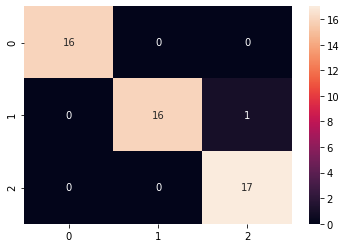

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

<font size="10"> Aggregate evaluation of performance </font>

- A classification model usually provides a score that a given instance belongs to a certain class. By using a threshold the class of this instance is defined.
- Two tools useful for defining the threshold are: ROC and PR Curves (and AUC metrics)

Another important metrics for understanding the ROC curve...

**True negative rate** or **specificity** (also called negative recall)

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/8f2c867f0641e498ec8a59de63697a3a45d66b07" width="40%">

**False positive rate**

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/422d06161964ca90602ec8712cd211cb0d80da19" width="40%">

<font size="10"> Generating the ROC Curve... </font>

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/threshold_scanning.png" width="70%">


<font size="10"> ROC curve </font>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/1280px-Roc_curve.svg.png" width="40%">

*Agnostic to prevalance (skew factor)

Image source: <a href="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/1280px-Roc_curve.svg.png"> wikipedia </a>

<font size="10"> ROC curve - not always easy to decide</font>

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6b/Roccurves.png" width="40%">

Image source: <a href="https://upload.wikimedia.org/wikipedia/commons/6/6b/Roccurves.png"> wikipedia </a>

<font size="10"> Area under the Curve (AUC) </font>

<span> <img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/auc.png" width="35%"> </span>

Summarizes the ROC Curve to a scalar number going from 0 (if the classifier is worse than random guess, which is very unlikely, so usually it starts from 0.5) and 1.


Image source: <a href="https://evispot.ai/area-under-the-roc-curve-auc/"> evispot.ai </a>

In [ ]:
### example of ROC AUC
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

from sklearn.datasets import make_classification  
from sklearn.metrics import roc_curve 

X, y = make_classification(n_samples=1100, n_classes=2, weights=[1,1], random_state=1)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

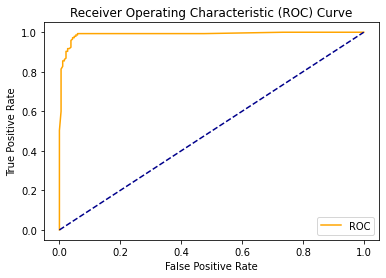

In [ ]:
from sklearn.ensemble import RandomForestClassifier  
model = RandomForestClassifier()  
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_curve(fper, tper)

In [ ]:
from sklearn.metrics import roc_auc_score
print(f"AUC ROC = {roc_auc_score(y_test, probs)}")

AUC ROC = 0.9886113699906802


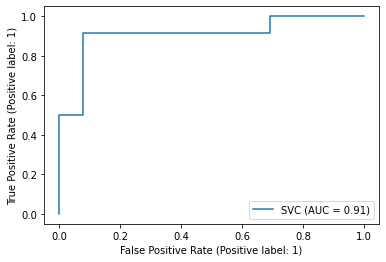

In [ ]:
from sklearn import datasets, metrics, model_selection, svm
X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)

metrics.plot_roc_curve(clf, X_test, y_test) 

plt.show()

<font size="10"> Precision-Recall (PR) Curve</font>

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/pr_curve.png" width="50%">

Tan, P. N., Steinbach, M., & Kumar, V. (2016). Introduction to data mining. Pearson Education India. 


<font size="10"> Precision-Recall (PR) Curve</font>

<img src="https://inf.ufsc.br/~jonata.tyska/lectureImages/pr_curve.png" width="25%">

- affected by class imbalance (prevalence)

- AUC PR is also called Average Precision.

- AP and mAP are very common metrics for object detection

Tan, P. N., Steinbach, M., & Kumar, V. (2016). Introduction to data mining. Pearson Education India. 


AUC PR=0.9869574297652314


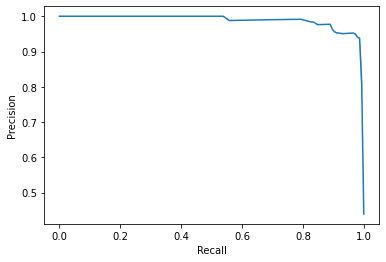

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

X, y = make_classification(n_samples=1100, n_classes=2, weights=[1,1], random_state=1)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.ensemble import RandomForestClassifier  
model = RandomForestClassifier()  
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)  
probs = probs[:, 1]  

precision, recall, thresholds = precision_recall_curve(y_test, probs)
ax = sns.lineplot(recall, precision)
_ = ax.set_xlabel("Recall")
_ = ax.set_ylabel("Precision")
print(f'AUC PR={auc(recall, precision)}')

<font size="10"> Evaluation metrics for regression </font>

- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- R² (Coefficient of determination)
- Mean Absolute Percentage Error (MAPE)

See the detailed equations and examples <a href="https://www.analyticsvidhya.com/blog/2022/01/evaluation-metrics-with-python-codes/" target="_blank"> here </a>

<font size="10"> Bibliography for this lecture </font>

Tan, P. N., Steinbach, M., & Kumar, V. (2016). Introduction to data mining. Pearson Education India. 

Ng, A. (2019). Machine learning yearning: Technical strategy for ai engineers in the era of deep learning. Retrieved online at https://www.mlyearning.org.



Examples (partially) extracted from:

https://www.codespeedy.com/how-to-plot-roc-curve-using-sklearn-library-in-python/

https://stackabuse.com/introduction-to-neural-networks-with-scikit-learn/

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html

https://stackoverflow.com/questions/29656550/how-to-plot-pr-curve-over-10-folds-of-cross-validation-in-scikit-learn